In [1]:
!pip install -r requirements.txt

Number of unique items:56
       words  counts
51       tie       4
85   quilted       4
100    small       4
102     lola       4
17     motif       5
(21, 2)


/home/samir/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


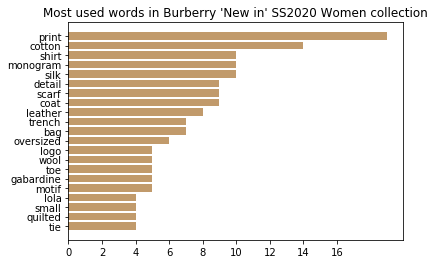

In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
urls = [
    "https://us.burberry.com/womens-new-arrivals-new-in/",
    "https://us.burberry.com/womens-new-arrivals-new-in/?start=2&pageSize=120&productsOffset=&cellsOffset=8&cellsLimit=&__lang=en"
]

# SCRAPING & CREATING A LIST OF LINKS
doc = []
for url in urls:
    r = requests.get(url)
    html_doc = r.text
    soup = BeautifulSoup(html_doc)

    for link in soup.find_all("a"):
        l = link.get("href")
        if "-p80" in l: # <-- THIS WILL NEED TO CHANGE
            doc.append(l)

# DEDUPLICATING THE LIST OF LINKS
doc_uniq = set(doc)
print("Number of unique items:"+str(len(doc_uniq)))

# CREATING A DICTIONARY WITH WORDS : COUNTS AND KEY : VALUE PAIRS
result = {}
for link in doc_uniq:
    words = link.replace("/", "").split("-")
    for word in words:
        if word in result:
            result[word] += 1
        else:
            result[word] = 1
            
words = list(result.keys())
counts = list(result.values())

# TURNING THE DICTIONARY INTO A DATAFRAME, SORTING & SELECTING FOR RELEVANCE
df = pd.DataFrame.from_dict({
    "words": words,
    "counts": counts,
})

df_sorted = df.sort_values("counts", ascending = True)
df_rel = df_sorted[df_sorted['counts']>3]
print(df_rel.head())
print(df_rel.shape) 

# PLOTTING
plt.barh(df_rel['words'], df_rel['counts'], color = "#C19A6B")
plt.title("Most used words in Burberry 'New in' SS2020 Women collection")
plt.xticks(np.arange(0, 18, step=2))
plt.savefig("SS2020_Burberry_word_frequency.jpg")
df_rel['brand']='burberry'

df_burberry = df_rel

Number of unique items:100


/home/samir/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


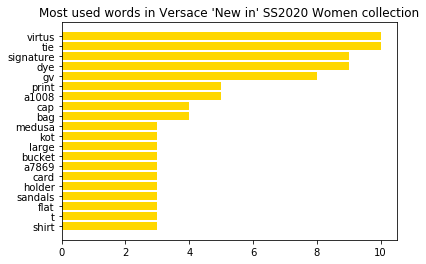

In [3]:
# VERSACE

# CREATING LIST OF RELEVANT URLS
url = "https://www.versace.com/us/en-us/women/new-arrivals/new-in/"
    
# SCRAPING & CREATING A LIST OF LINKS
doc = []
#for url in urls:
r = requests.get(url)
html_doc = r.text
soup = BeautifulSoup(html_doc)
soup_f = soup.find_all("a")
for t in soup_f:
    a = t.get("href")
    if a.startswith("/us/en-us/women/new-arrivals/new-in/"):
        doc.append(a)


# DEDUPLICATING THE LIST OF LINKS
doc_uniq = set(doc)
print("Number of unique items:"+str(len(doc_uniq)))
#print(doc_uniq)

result = {}
garbage = []
for link in doc_uniq:
    if link.startswith("/us/en-us/women/new-arrivals/new-in/?"):
        continue
    words = link.replace("/us/en-us/women/new-arrivals/new-in/", "") .split("/")
    words = words[0].split("-")
    
    for word in words:
        if word in result:
            result[word] += 1
        else:
            result[word] = 1

words = list(result.keys())
counts = list(result.values())
#print(result)

# TURNING THE DICTIONARY INTO A DATAFRAME, SORTING & SELECTING FOR RELEVANCE
df = pd.DataFrame.from_dict({
    "words": words,
    "counts": counts,
})

df2 = df.set_index("words")
#df2 = df.drop(["a1008"],axis=0)
df_sorted = df2.sort_values("counts", ascending = True)
df_rel = df_sorted[df_sorted['counts']>2]
#print(df_rel.head())
#print(df_rel.shape) 

#PLOTTING
plt.barh(df_rel.index, df_rel['counts'], color = "#FFD700")
plt.title("Most used words in Versace 'New in' SS2020 Women collection")
plt.savefig("SS2020_Versace_word_frequency.jpg")
df_rel['brand']='versace'

df_versace = df_rel

Number of unique items:76


/home/samir/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


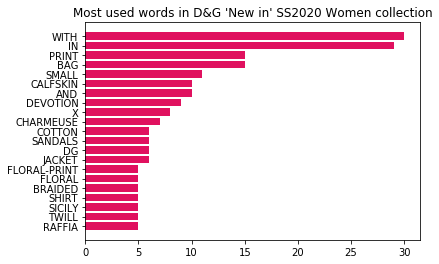

In [4]:
# CREATING LIST OF RELEVANT URLS
urls = []
#urls = list(urls)
for i in [1,2,3,4]:
    u = str("https://us.dolcegabbana.com/en/women/highlights/new-in/?page=") + str(i)
    urls.append(u)
    
#print(urls)

# SCRAPING & CREATING A LIST OF LINKS
doc = []
for url in urls:
    r = requests.get(url)
    html_doc = r.text
    soup = BeautifulSoup(html_doc)
    soup_f = soup.find_all("a")
    
    for t in soup_f:
        a = t.get("aria-label")
        if a != None and a.startswith("Visit"):
            doc.append(a)
#print(doc)

# DEDUPLICATING THE LIST OF LINKS
doc_uniq = set(doc)
print("Number of unique items:"+str(len(doc_uniq)))

result = {}
for link in doc_uniq:
    words = link.replace("Visit", "").replace(" product page","").split(" ")                                                                                                                                      
    for word in words:
        if word in result:
            result[word] += 1
        else:
            result[word] = 1
del(result[""])
words = list(result.keys())
counts = list(result.values())

# TURNING THE DICTIONARY INTO A DATAFRAME, SORTING & SELECTING FOR RELEVANCE
df = pd.DataFrame.from_dict({
    "words": words,
    "counts": counts,
})

df2 = df.set_index("words")
#df2.drop(["", "WITH"])
df_sorted = df2.sort_values("counts", ascending = True)
df_rel = df_sorted[df_sorted['counts']>4]
#print(df_rel.head())
#print(df_rel.shape) 


# PLOTTING
plt.barh(df_rel.index, df_rel['counts'], color = "#E0115F")
plt.title("Most used words in D&G 'New in' SS2020 Women collection")
plt.savefig("SS2020_D&G_word_frequency.jpg", pad_inches=0.1)
df_rel['brand']='d&g'

df_dg = df_rel

In [5]:
df_brands = pd.concat([df_versace.reset_index(), df_burberry.reset_index(), df_dg.reset_index()])

/home/samir/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [6]:
df_brands = df_brands.drop(columns=['index'])

In [7]:
df_brands['words'] = df_brands['words'].str.upper()

In [8]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [9]:
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df_brands['words'])
print(integer_encoded)

[38 43 16 36 21  8  1  5 25 24 29  3  7  0 33 20 15 40 44 48 44 34 42 28
 31 19 45 50 27 32  3 46 26 10 37 12 41 30 38 11 33 35 47 39 38  4 17 18
 23 14 36 11  9 51 13  2  6 42  3 33 22 49]


In [10]:
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

In [11]:
def brand_target(brand):
    if 'versace' in brand:
        val = 0
    elif 'burberry' in brand:
        val = 1
    elif 'd&g' in brand:
        val = 2
    else:
        raise ValueError(f'Invalid brand: {brand}')
    return val

In [12]:
def apply_brand_loop(df):
    brand_list = []
    for i in range(len(df)):
        brand = df.iloc[i]['brand']
        target = brand_target(brand)
        brand_list.append(target)
    return brand_list

In [13]:
brands_transformed = apply_brand_loop(df_brands.copy())
y = brands_transformed

X = onehot_encoded

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
models = []

In [16]:
from sklearn.dummy import DummyClassifier


models.append(("Baseline", DummyClassifier(random_state=391488407)))

In [17]:
from sklearn.svm import SVC
#models.append(("Support vector (C=1.30)", SVC(C=1.30, gamma="scale")))
#models.append(("Support vector (C=0.45)", SVC(C=0.45, gamma="scale")))
#models.append(("Support vector (C=4.80)", SVC(C=4.80, gamma="scale")))
models.append(("Support vector (C=1.00)", SVC(C=1.00, gamma="scale")))
models.append(("Support vector (C=0.25)", SVC(C=0.25, gamma="scale")))
models.append(("Support vector (C=4.00)", SVC(C=4.00, gamma="scale")))

In [18]:
from sklearn.ensemble import RandomForestClassifier


models.append(("Random Forest", RandomForestClassifier(n_estimators=100, random_state=1283220422)))
from sklearn.linear_model import LogisticRegression


models.append(("Logistic Regression (C=1.00)",
               LogisticRegression(C=1.00, solver="liblinear", penalty="l1")))

models.append(("Logistic Regression (C=0.25)",
               LogisticRegression(C=0.25, solver="liblinear", penalty="l1")))

models.append(("Logistic Regression (C=4.00)",
               LogisticRegression(C=4.00, solver="liblinear", penalty="l1")))

In [19]:
from sklearn.neighbors import KNeighborsClassifier


models.append(("1-nn euclidean",
               KNeighborsClassifier(n_neighbors=1)))

models.append(("1-nn cosine",
               KNeighborsClassifier(n_neighbors=1, metric="cosine")))

models.append(("5-nn cosine",
               KNeighborsClassifier(n_neighbors=5, metric="cosine")))

In [20]:
models = dict(models)

In [21]:
for name, clf in models.items():
    clf.fit(X_train, y_train)

/home/samir/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [22]:
scores = pd.Series({name: clf.score(X_test, y_test) for name, clf in models.items()}, name="Accuracy")

In [23]:
scores

Baseline                        0.285714
Support vector (C=1.00)         0.142857
Support vector (C=0.25)         0.190476
Support vector (C=4.00)         0.142857
Random Forest                   0.142857
Logistic Regression (C=1.00)    0.190476
Logistic Regression (C=0.25)    0.190476
Logistic Regression (C=4.00)    0.142857
1-nn euclidean                  0.142857
1-nn cosine                     0.142857
5-nn cosine                     0.142857
Name: Accuracy, dtype: float64